# Analysis of Yelp Business Intelligence Data

I will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset) although we have taken steps to pull this data into a publis s3 bucket: `s3://sta9760-lei-yelpdatasets/yelp/*.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`

In [1]:
%%info

In [2]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("scipy==1.7.0")
sc.install_pypi_package( "seaborn==0.10.0" )

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1638322848865_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a0/34/895006117f6fce0b4de045c87e154ee4a20c68ec0a4c9a36d900888fb6bc/pyparsing-3.0.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/6b/6e567cb2e86d4e5939a9233f8734e26021b6a9c1bc4b1edccba236a84cc2/kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_

In [3]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
cycler                     0.11.0   
jmespath                   0.10.0   
joblib                     0.16.0   
kiwisolver                 1.3.2    
lxml                       4.5.2    
matplotlib                 3.2.1    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pandas                     1.0.3    
pip                        9.0.1    
py-dateutil                2.2      
pyparsing                  3.0.6    
python-dateutil            2.8.2    
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
scipy                      1.7.0    
seaborn                    0.10.0   
setuptools                 28.8.0   
s

## Importing

Now, import the installed packages from the previous block below.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

We are finally ready to load data. Using `spark` load the data from S3 into a `dataframe` object that we can manipulate further down in our analysis.

In [5]:
df = spark.read.json('s3://sta9760-lei-yelpdatasets/yelp/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
type(df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.sql.dataframe.DataFrame'>

## Overview of Data

Display the number of rows and columns in our dataset.

In [7]:
print(f'Total Columns: {len(df.dtypes)}')
print(f'Total Rows: {df.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 160,585

In [8]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the DataFrame schema below.

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `stars`
* `categories`

In [9]:
df.createOrReplaceTempView('business')
sqldf = spark.sql(
'''
SELECT business_id,name,city,state,stars,categories
FROM business
LIMIT 5
'''
)
sqldf.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+-----+--------------------+
|         business_id|                name|       city|state|stars|          categories|
+--------------------+--------------------+-----------+-----+-----+--------------------+
|wlCwgeZgAr3Nz5etw...|    All Paws on Deck| Marblehead|   MA|  5.0|Pets, Pet Groomer...|
|pme8Sq7O_cNnZv4kP...|             Dunkin'|East Boston|   MA|  3.0|Food, Coffee & Te...|
|NVmRRoIfMet-vH4Qt...|             Tis Tik|  Cambridge|   MA|  4.5|Fashion, Shopping...|
|qfuIvXCy5ew_5IYp3...|                IHOP| Grove City|   OH|  2.0|American (Traditi...|
|MRpeGySmH2jTVhyZL...|Sams Falafel & Sh...| Somerville|   MA|  4.5|Falafel, Mediterr...|
+--------------------+--------------------+-----------+-----+-----+--------------------+

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [10]:
df.select('business_id','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|6iYb2HFDywm3zjuRg...|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|Gyms, Active Life...|
+--------------------+--------------------+
only showing top 5 rows

In [11]:
from pyspark.sql.functions import split, explode

association_table= df.select("business_id",explode(split(df.categories, ', '))\
                     .alias('category'))
association_table.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|            category|
+--------------------+--------------------+
|6iYb2HFDywm3zjuRg...|          Gastropubs|
|6iYb2HFDywm3zjuRg...|                Food|
|6iYb2HFDywm3zjuRg...|        Beer Gardens|
|6iYb2HFDywm3zjuRg...|         Restaurants|
|6iYb2HFDywm3zjuRg...|                Bars|
|6iYb2HFDywm3zjuRg...|American (Traditi...|
|6iYb2HFDywm3zjuRg...|            Beer Bar|
|6iYb2HFDywm3zjuRg...|           Nightlife|
|6iYb2HFDywm3zjuRg...|           Breweries|
|tCbdrRPZA0oiIYSmH...|               Salad|
|tCbdrRPZA0oiIYSmH...|                Soup|
|tCbdrRPZA0oiIYSmH...|          Sandwiches|
|tCbdrRPZA0oiIYSmH...|               Delis|
|tCbdrRPZA0oiIYSmH...|         Restaurants|
|tCbdrRPZA0oiIYSmH...|               Cafes|
|tCbdrRPZA0oiIYSmH...|          Vegetarian|
|bvN78flM8NLprQ1a1...|            Antiques|
|bvN78flM8NLprQ1a1...|             Fashion|
|bvN78flM8NLprQ1a1...|                Used|
|bvN78flM8NLprQ1a1...|Vintage & 

Display the first 5 rows of your association table below.

In [12]:
association_table.select('business_id','category').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|         business_id|    category|
+--------------------+------------+
|6iYb2HFDywm3zjuRg...|  Gastropubs|
|6iYb2HFDywm3zjuRg...|        Food|
|6iYb2HFDywm3zjuRg...|Beer Gardens|
|6iYb2HFDywm3zjuRg...| Restaurants|
|6iYb2HFDywm3zjuRg...|        Bars|
+--------------------+------------+
only showing top 5 rows

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [13]:
association_table.select('category').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1330

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [14]:
count_category= df.select(explode(split(df.categories, ', '))\
                                       .alias('category'))\
.select('category').groupby('category').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|      Dermatologists|  351|
|      Paddleboarding|   67|
|        Aerial Tours|    8|
|         Hobby Shops|  610|
|          Bubble Tea|  779|
|             Embassy|    9|
|             Tanning|  701|
|            Handyman|  507|
|      Aerial Fitness|   13|
|             Falafel|  141|
|       Outlet Stores|  184|
|        Summer Camps|  308|
|     Clothing Rental|   37|
|      Sporting Goods| 1864|
|     Cooking Schools|  114|
|  College Counseling|   20|
|  Lactation Services|   47|
|Ski & Snowboard S...|   55|
|             Museums|  336|
|     Baseball Fields|   17|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [15]:
top_category = association_table.groupby('category')\
                    .count()\
                    .orderBy(['count'], ascending = False)
top_category.show(20) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|         Restaurants|50763|
|                Food|29469|
|            Shopping|26205|
|       Beauty & Spas|16574|
|       Home Services|16465|
|    Health & Medical|15102|
|      Local Services|12192|
|           Nightlife|11990|
|                Bars|10741|
|          Automotive|10119|
|Event Planning & ...| 9644|
|         Active Life| 9231|
|        Coffee & Tea| 7725|
|          Sandwiches| 7272|
|             Fashion| 6599|
|American (Traditi...| 6541|
|         Hair Salons| 5900|
|               Pizza| 5756|
|     Hotels & Travel| 5703|
|  Breakfast & Brunch| 5505|
+--------------------+-----+
only showing top 20 rows

In [16]:
%matplotlib inline

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

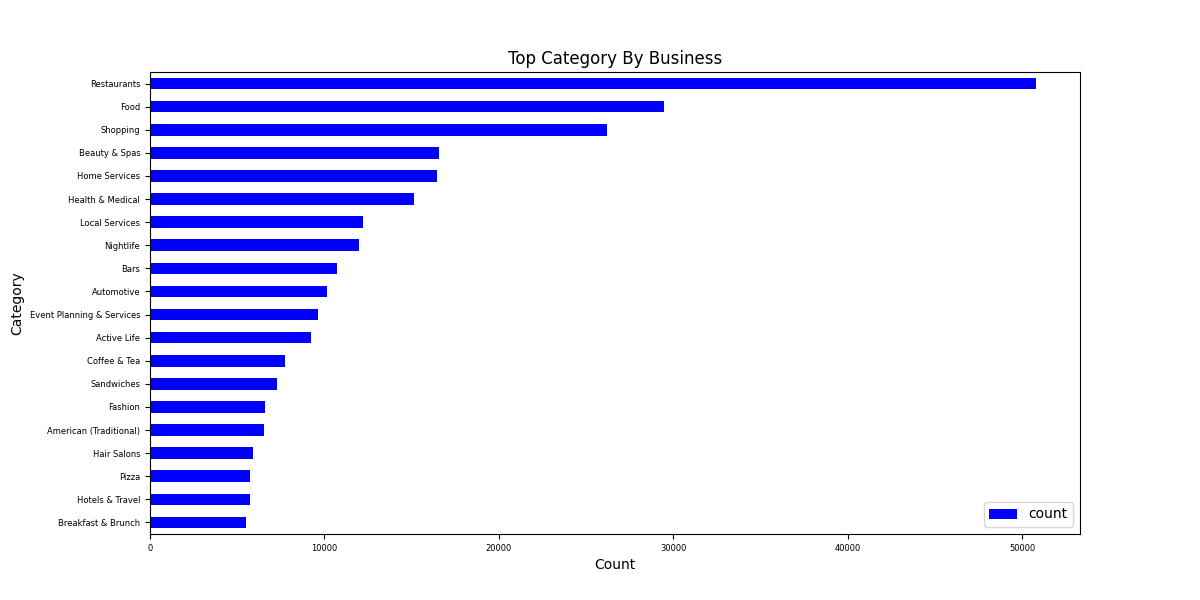

In [17]:
df_plt=top_category.toPandas().sort_values(by='count',ascending=False).head(20).sort_values(by='count',ascending=True)\
.plot(x='category',y='count',kind='barh',fontsize=6,figsize=(12, 6), color = 'blue')
plt.ylabel('Category')
plt.xlabel('Count')
plt.title('Top Category By Business')
%matplot plt


# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [18]:
Reviewdf= spark.read.json('s3://sta9760-lei-yelpdatasets/yelp/yelp_academic_dataset_review.json')
Reviewdf.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [19]:
Reviewdf.createOrReplaceTempView('review')
sqldf = spark.sql(
'''
SELECT business_id,stars
FROM review
LIMIT 5
'''
)
sqldf.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|DiRIdYhGyuTNZurKy...|  3.0|
|bPmWDBkjBhV11Yk4B...|  5.0|
|xHdKDNcJrvkYJkAGs...|  4.0|
|Irp5sgl7XASH5ZTw2...|  5.0|
|R8fLQ6TLz06MQR69K...|  3.0|
+--------------------+-----+

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [20]:
Reviewdf.createOrReplaceTempView('review')
sqldf = spark.sql(
'''
SELECT business_id,avg(stars)
FROM review
GROUP BY business_id
LIMIT 5
'''
)
sqldf.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       avg(stars)|
+--------------------+-----------------+
|yWG3JLNsqEkU1Y8wj...|3.423076923076923|
|4jQ1y1_ItTCj3C9Xl...|             3.28|
|ZmRWz7YKDbc_ONBS1...|              4.0|
|DT-WVQB-R_iiShvCo...|              1.8|
|GobfrBZcaDBtCM8P9...|4.361111111111111|
+--------------------+-----------------+

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

Let's see a few of these:

In [21]:
df.createOrReplaceTempView('business')
Reviewdf.createOrReplaceTempView('review')
sqldf = spark.sql(
'''
SELECT DISTINCT AVG(review.stars) OVER (PARTITION BY review.business_id) AS avg_stars,business.stars,name,city,state
FROM 
business
JOIN
review
ON business.business_id=review.business_id
ORDER BY avg_stars DESC
LIMIT 5
'''
)

sqldf.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+--------------------+----------+-----+
|avg_stars|stars|                name|      city|state|
+---------+-----+--------------------+----------+-----+
|      5.0|  5.0|                 Jet|    Austin|   TX|
|      5.0|  5.0|       Chore Masters|    Austin|   TX|
|      5.0|  5.0|Integrity Electri...|Wilmington|   MA|
|      5.0|  5.0|     The Mama Mantra|    Austin|   TX|
|      5.0|  5.0|  Buda Health Center|      Buda|   TX|
+---------+-----+--------------------+----------+-----+

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [22]:
sqldf = spark.sql(
'''
SELECT ROUND((avg_stars-stars)/stars,3) as skew FROM
(SELECT DISTINCT AVG(review.stars) OVER (PARTITION BY review.business_id) AS avg_stars,business.stars,name,city,state
FROM 
business
JOIN
review
ON business.business_id=review.business_id
)
'''
)

sqldf.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+
|  skew|
+------+
|   0.0|
|   0.0|
| 0.123|
| 0.026|
| 0.007|
| 0.014|
|-0.043|
|   0.0|
| 0.014|
| 0.086|
|-0.022|
| 0.086|
|-0.044|
|-0.042|
| 0.056|
|-0.111|
| 0.067|
|-0.049|
| 0.083|
|  0.05|
+------+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

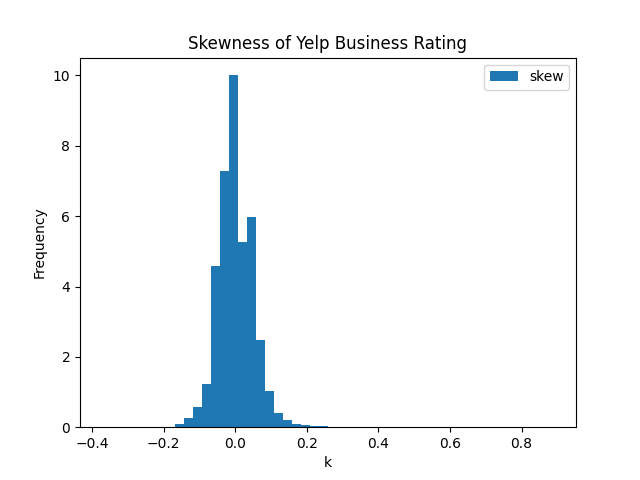

In [23]:
sqldf.toPandas().plot(kind='hist',bins=50,title = "Skewness of Yelp Business Rating",density=True)
plt.xlabel('k')
%matplot plt

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

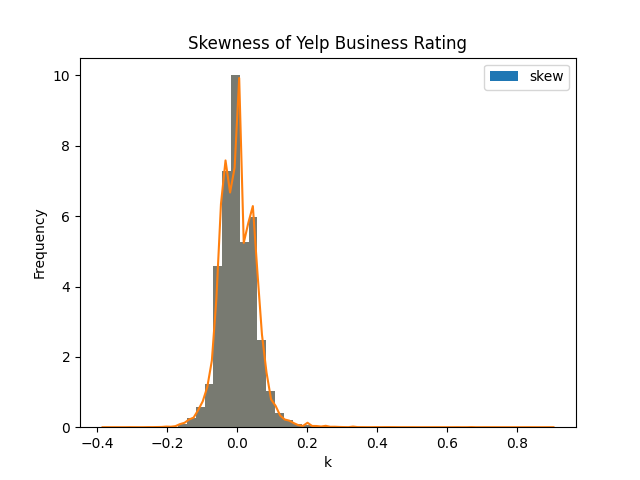

In [24]:
sns.distplot(sqldf.toPandas(), bins =50).\
    set(title = "Skewness of Yelp Business Rating")

%matplot plt

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

Yes, it is skew negative. Reviewers who left a written response were more unsatisfied than normal

# Should the Elite be Trusted? (Or, some other analysis of your choice)

For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The **ONLY** requirement is that you must use the **Users** dataset and join on either the **business* or **reviews** dataset
* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

# Loading user data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [25]:
Userdf=spark.read.json('s3://sta9760-lei-yelpdatasets/yelp/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
Userdf.printSchema()
Reviewdf.printSchema()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

root
 |-- business_id: string (nullable = true)
 |-- cool: long (null

In [27]:
Userdf.createOrReplaceTempView('user')
Reviewdf.createOrReplaceTempView('review')
user_t = spark.sql(
'''
SELECT user_id, elite, average_stars, review_count
FROM user
'''
)
review_t = spark.sql(
'''
SELECT user_id,business_id,stars
FROM review
'''
)
user_t.show()
review_t.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+------------+
|             user_id|               elite|average_stars|review_count|
+--------------------+--------------------+-------------+------------+
|q_QQ5kBBwlCcbL1s4...|2006,2007,2008,20...|         3.85|        1220|
|dIIKEfOgo0KqUfGQv...|2007,2008,2009,20...|         4.09|        2136|
|D6ErcUnFALnCQN4b1...|           2010,2011|         3.76|         119|
|JnPIjvC0cmooNDfsa...|2009,2010,2011,20...|         3.77|         987|
|37Hc8hr3cw0iHLoPz...|      2009,2010,2011|         3.72|         495|
|n-QwITZYrXlKQRiV3...|2010,2011,2012,20...|         3.59|         229|
|eCJoZqpV1fDKJGAsX...|                    |         3.86|          51|
|cojecOwQJpsYDxnjt...|           2010,2011|         3.79|          51|
|1jXmzuIFKxTnEnR0p...|2010,2011,2012,20...|         3.43|         299|
|-8QoOIfvwwxJ4sY20...|2012,2013,2014,20...|         3.88|         288|
|EtofuImujQBSo02xa...|           2009,2010|         3.83|          44|
|cxS6d

# Join user table with reviews table

In [28]:

user_t.createOrReplaceTempView('user_t')
review_t.createOrReplaceTempView('review_t')
UserReviewdf = spark.sql(
'''
SELECT review_t.business_id,review_t.stars,user_t.elite,user_t.average_stars,user_t.review_count
FROM review_t,user_t
WHERE review_t.user_id=user_t.user_id
'''
)
UserReviewdf.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+-----+-------------+------------+
|         business_id|stars|elite|average_stars|review_count|
+--------------------+-----+-----+-------------+------------+
|GgR7kcKykuqXB11fW...|  5.0|     |         2.62|          12|
|rxNfidGLHtMYyLNeo...|  5.0|     |         3.67|          11|
|2OaX6XjAoI7VD6jLd...|  2.0|     |         2.73|          11|
|IfOj3AxPl3Exsd_Yl...|  1.0|     |         2.73|          11|
|bAuYOa-VuqTOnKzWN...|  2.0|     |         2.73|          11|
|vqQXI-Pxz3izeTUF6...|  5.0|     |         2.73|          11|
|ggqr9BEklylICKl77...|  2.0|     |         3.67|          11|
|kj77ZrCsFlVuqWkIr...|  5.0|     |         3.67|          11|
|huveiOZFjsFI_Aiq9...|  4.0|     |         3.67|          11|
|szJPyyYqJRxithtH6...|  4.0|     |         3.67|          11|
|piuF4DdprICZgRent...|  2.0|     |         3.67|          11|
|_ihrL49Ua4O_qd_G-...|  5.0|     |         3.67|          11|
|ENBeXC1MunFTlgl_7...|  1.0|     |         2.25|           7|
|VZVkZx2

# Replace Elite user with YES, otherwise NO

In [29]:
UserReviewdf.createOrReplaceTempView('ur')
elite_user = spark.sql(
'''
SELECT business_id,stars,average_stars, review_count, (CASE
WHEN elite like '' THEN 'NO' ELSE 'YES' END)AS Elite_Y_N
FROM ur
'''
)

elite_user.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+-------------+------------+---------+
|         business_id|stars|average_stars|review_count|Elite_Y_N|
+--------------------+-----+-------------+------------+---------+
|GgR7kcKykuqXB11fW...|  5.0|         2.62|          12|       NO|
|rxNfidGLHtMYyLNeo...|  5.0|         3.67|          11|       NO|
|bAuYOa-VuqTOnKzWN...|  2.0|         2.73|          11|       NO|
|vqQXI-Pxz3izeTUF6...|  5.0|         2.73|          11|       NO|
|2OaX6XjAoI7VD6jLd...|  2.0|         2.73|          11|       NO|
|IfOj3AxPl3Exsd_Yl...|  1.0|         2.73|          11|       NO|
|piuF4DdprICZgRent...|  2.0|         3.67|          11|       NO|
|_ihrL49Ua4O_qd_G-...|  5.0|         3.67|          11|       NO|
|kj77ZrCsFlVuqWkIr...|  5.0|         3.67|          11|       NO|
|szJPyyYqJRxithtH6...|  4.0|         3.67|          11|       NO|
|ggqr9BEklylICKl77...|  2.0|         3.67|          11|       NO|
|huveiOZFjsFI_Aiq9...|  4.0|         3.67|          11|       NO|
|VZVkZx2Zs

# Calculate the difference between all users' average_stars ratings with actual business ratings

In [30]:
elite_user.createOrReplaceTempView('elite_user')
star_diff = spark.sql(
'''
SELECT business_id,stars,average_stars,abs(stars-average_stars) AS abs_diff, Elite_Y_N
FROM elite_user
'''
)
star_diff.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+-------------+-------------------+---------+
|         business_id|stars|average_stars|           abs_diff|Elite_Y_N|
+--------------------+-----+-------------+-------------------+---------+
|GgR7kcKykuqXB11fW...|  5.0|         2.62|               2.38|       NO|
|rxNfidGLHtMYyLNeo...|  5.0|         3.67|               1.33|       NO|
|bAuYOa-VuqTOnKzWN...|  2.0|         2.73|               0.73|       NO|
|vqQXI-Pxz3izeTUF6...|  5.0|         2.73|               2.27|       NO|
|2OaX6XjAoI7VD6jLd...|  2.0|         2.73|               0.73|       NO|
|IfOj3AxPl3Exsd_Yl...|  1.0|         2.73|               1.73|       NO|
|ggqr9BEklylICKl77...|  2.0|         3.67|               1.67|       NO|
|kj77ZrCsFlVuqWkIr...|  5.0|         3.67|               1.33|       NO|
|huveiOZFjsFI_Aiq9...|  4.0|         3.67|0.33000000000000007|       NO|
|piuF4DdprICZgRent...|  2.0|         3.67|               1.67|       NO|
|_ihrL49Ua4O_qd_G-...|  5.0|         3.67|         

# Extract and filter users are elit, display their ratings difference with actual business ratings

In [31]:
star_diff.createOrReplaceTempView('star_diff')
elit_diff = spark.sql(
'''
SELECT abs_diff, Elite_Y_N as Elite_Y
FROM star_diff
WHERE Elite_Y_N="YES"
'''
)
elit_diff.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------+
|            abs_diff|Elite_Y|
+--------------------+-------+
| 0.16999999999999993|    YES|
|  0.5299999999999998|    YES|
|                1.35|    YES|
|0.009999999999999787|    YES|
|  0.3700000000000001|    YES|
|  0.3700000000000001|    YES|
|  0.9900000000000002|    YES|
|  0.8500000000000001|    YES|
|  0.3700000000000001|    YES|
|  1.8199999999999998|    YES|
|  0.1499999999999999|    YES|
|  0.5899999999999999|    YES|
|  1.1800000000000002|    YES|
|  0.6299999999999999|    YES|
|  0.8700000000000001|    YES|
|  0.9900000000000002|    YES|
| 0.10000000000000009|    YES|
|                1.37|    YES|
|  0.3700000000000001|    YES|
|                1.35|    YES|
+--------------------+-------+
only showing top 20 rows

# Visualization of elit users rating with actual business star ratings

Now, Following is the histogram displays absoluate difference between the ratings of elit users and the actual business star ratings. The absoulate difference is centralizing between [0,1].Let's do further explore.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

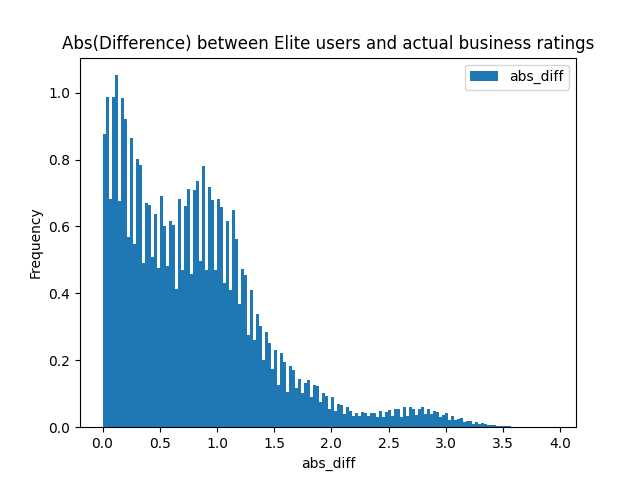

In [32]:
elit_diff.createOrReplaceTempView('elit_diff')
diff = spark.sql(
'''
SELECT abs_diff
FROM elit_diff
'''
)

diff.toPandas().plot(kind='hist',bins=150,title = "Abs(Difference) between Elite users and actual business ratings",density=True)
plt.xlabel('abs_diff')
%matplot plt

Now, let's check for for different absoulate range, how much within total elite users.

In [33]:
total=elit_diff.select('Elite_Y').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
total

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2169088

In [36]:
abs_diff_between01 = elit_diff.filter(elit_diff['abs_diff'] <= 1).count()
abs_diff_between01_perc=abs_diff_between01/total
abs_diff_between12 = elit_diff.filter(elit_diff['abs_diff'] >1).filter(elit_diff['abs_diff'] <=2).count()
abs_diff_between12_perc=abs_diff_between12/total
abs_diff_between23 = elit_diff.filter(elit_diff['abs_diff'] >2).filter(elit_diff['abs_diff'] <=3).count()
abs_diff_between23_perc=abs_diff_between23/total
abs_diff_between34 = elit_diff.filter(elit_diff['abs_diff'] >3).filter(elit_diff['abs_diff'] <=4).count()
abs_diff_between34_perc=abs_diff_between34/total
abs_diff_between45 = elit_diff.filter(elit_diff['abs_diff'] >4).filter(elit_diff['abs_diff'] <=5).count()
abs_diff_between45_perc=abs_diff_between45/total

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
column=["abs_difference","Count/Total"]
data=[("0-1",abs_diff_between01_perc),
     ("1-2",abs_diff_between12_perc),
     ("2-3",abs_diff_between23_perc),
     ("3-4",abs_diff_between34_perc),
     ("4-5",abs_diff_between45_perc)]
diff_table=spark.createDataFrame(data=data,schema=column)
diff_table.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+--------------------+
|abs_difference|Count/Total         |
+--------------+--------------------+
|0-1           |0.680122244925056   |
|1-2           |0.26562822716275225 |
|2-3           |0.046277974890829694|
|3-4           |0.007971553021361974|
|4-5           |0.0                 |
+--------------+--------------------+

In [38]:
diff_table = diff_table.toPandas()
diff_table = diff_table.set_index('abs_difference')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

By below  different absoulate range barh chart, we can tell that most of the elite users rating with actual business rating absoulate difference is in the range of [0.1], it is about 68%. Therefore, the elite user should be trusted.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

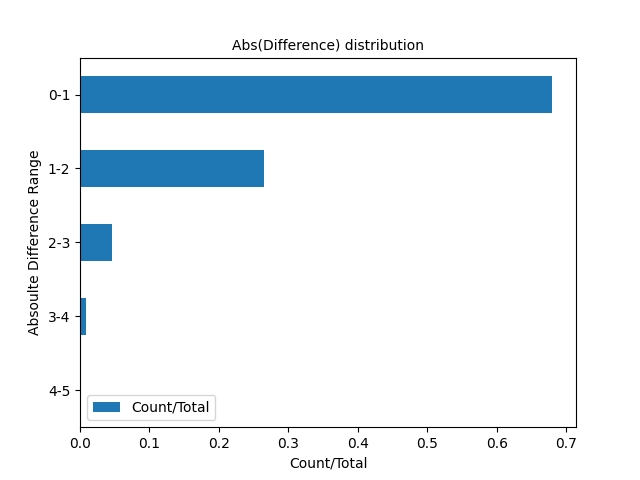

In [39]:
diff_table.plot.barh().invert_yaxis()
plt.title('Abs(Difference) distribution',fontsize=10)
plt.xlabel('Count/Total',fontsize=10)
plt.ylabel('Absoulte Difference Range',fontsize=10)
%matplot plt